In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [31]:
len(test_images)

10000

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

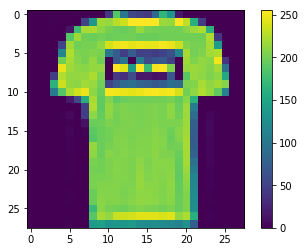

In [17]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images/255.0

In [20]:
test_images = test_images/255.0

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [22]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2302 - accuracy: 0.9133
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2223 - accuracy: 0.9165
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2149 - accuracy: 0.9192
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2076 - accuracy: 0.9230
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2036 - accuracy: 0.9242
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1975 - accuracy: 0.9261
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1938 - accuracy: 0.9269
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1874 - accuracy: 0.9297
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1810 - accuracy: 0.9321
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.179

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 946us/step - loss: 0.3640 - accuracy: 0.8901
Test accuracy: 0.8901000022888184


In [26]:
predictions = model.predict(test_images)
predictions[0]

array([5.2389353e-16, 3.6359435e-16, 8.8294672e-16, 9.9843356e-20,
       1.2917514e-15, 1.5158815e-07, 2.5520917e-18, 9.2893730e-05,
       1.1451310e-12, 9.9990690e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

Pick a number: 5


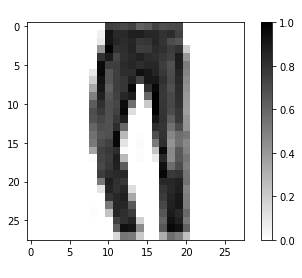

In [29]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

In [32]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)